<a href="https://colab.research.google.com/github/jasleenkaur2001/ANZ/blob/main/ANZ_predictive_analysis_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dataFrame = pd.read_excel("/content/ANZ synthesised transaction dataset task2.xlsx")

In [3]:
dataFrame.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
print(dataFrame.shape)

(12043, 23)


In [5]:
print(dataFrame.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Since most of the values in bpay_biller_code and  merchant_code are None therefore they can be dropped.

In [7]:
dataFrame.drop(['bpay_biller_code', 'merchant_code'], axis=1, inplace=True)

In [8]:
dataFrame.nunique()

status                   2
card_present_flag        2
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

There is only one unique Currency and country so they can be dropped.

In [9]:
dataFrame.drop(['currency','country'],axis=1,inplace=True)

In [10]:
dataFrame.duplicated().sum() # Check for duplicacy the dataset

0

In [11]:
dataFrame['age_group']=pd.cut(dataFrame.age,[0,18,30,40,50,60,80],labels=['<18','18-30','30-40','40-50','50-60','>60'])
# to categorize data on basis of age

In [12]:
dataFrame.loc[:,['extraction','date']] = dataFrame.loc[:,['extraction','date']].apply(pd.to_datetime, errors='coerce')
# to convert date time to utc format

In [13]:
dataFrame['year'] = dataFrame['date'].dt.year
dataFrame['month'] =dataFrame['date'].dt.month_name()
dataFrame['day'] = dataFrame['date'].dt.day_name()
dataFrame['hour']= dataFrame.extraction.dt.hour
# split the date column into moths and days

In [14]:
dataFrame.card_present_flag = dataFrame.card_present_flag.astype('Int64')

In [15]:
ndataFrame = dataFrame[dataFrame['txn_description'] == 'PAY/SALARY']


In [16]:
ndataFrame.drop(['card_present_flag' ,'merchant_id','merchant_suburb', 'merchant_state' , 'merchant_long_lat' , 'year'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
dataFrame2 = pd.DataFrame(ndataFrame.groupby(['account','first_name','gender','age','long_lat'], as_index=False)['amount'].agg('sum'))
dataFrame2['annual_salary'] = 4 * dataFrame2['amount'] # as it is over 3 months

# Checking Correlation 

-0.05275093071189322


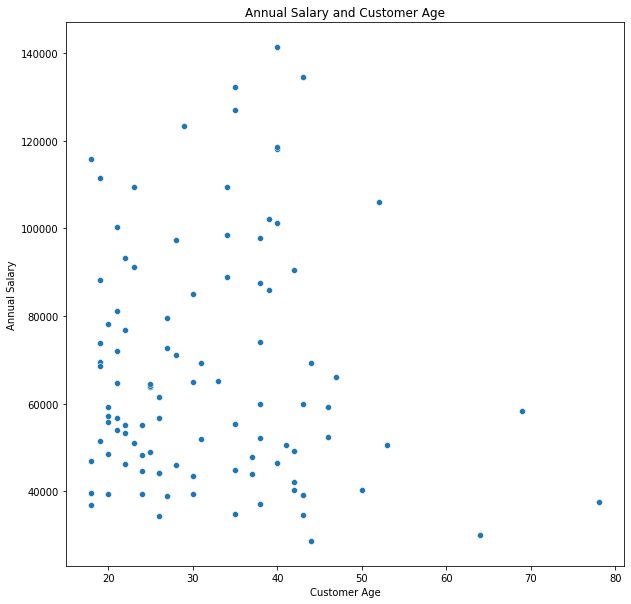

In [18]:
age_sal_corr, age_pv = spearmanr(dataFrame2['age'], dataFrame2['annual_salary'])
print(age_sal_corr)
plt.figure(figsize=(10,10))
sns.scatterplot(x=dataFrame2['age'], y=dataFrame2['annual_salary'])
plt.title('Annual Salary and Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Annual Salary')
plt.show()

0.00838481956717104


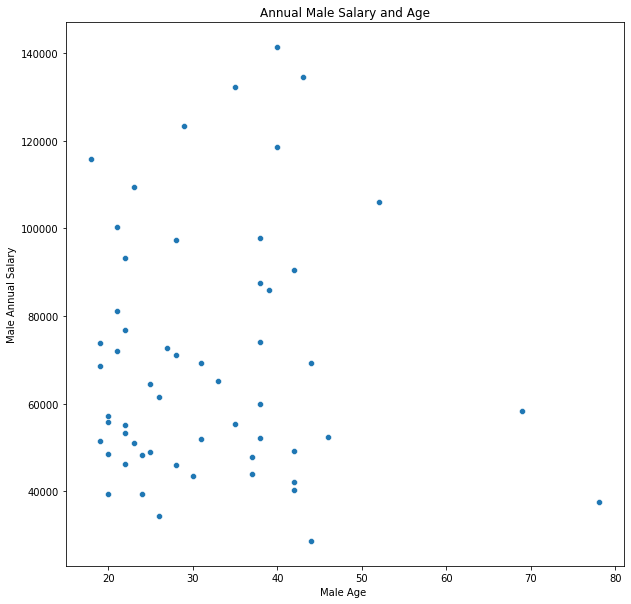

In [19]:
male_dataFrame = dataFrame2[dataFrame2['gender'] == 'M']
female_dataFrame = dataFrame2[dataFrame2['gender'] == 'F']
male_sal_corr , male_pv = spearmanr(male_dataFrame['age'] , male_dataFrame['annual_salary'])
print(male_sal_corr)
plt.figure(figsize=(10,10))
sns.scatterplot(x=male_dataFrame['age'], y=male_dataFrame['annual_salary'])
plt.title('Annual Male Salary and Age')
plt.xlabel('Male Age ')
plt.ylabel('Male Annual Salary')
plt.show()

-0.11390272460557464


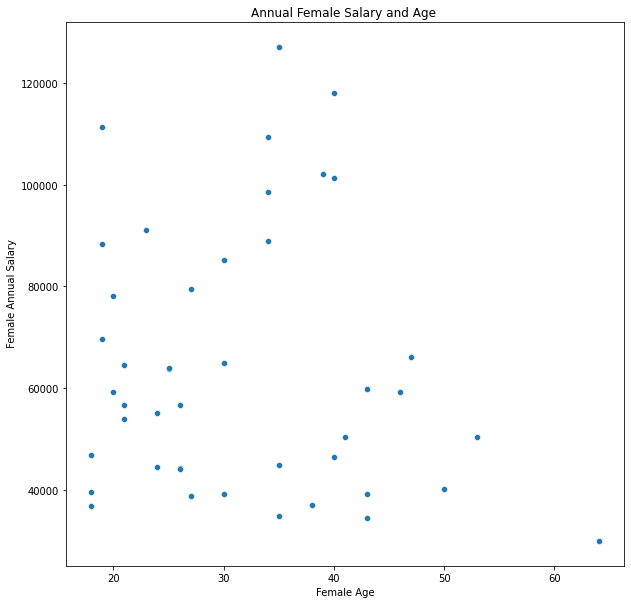

In [20]:
female_sal_corr , female_pv = spearmanr(female_dataFrame['age'] , female_dataFrame['annual_salary'])
print(female_sal_corr)
plt.figure(figsize=(10,10))
sns.scatterplot(x=female_dataFrame['age'], y=female_dataFrame['annual_salary'])
plt.title('Annual Female Salary and Age ')
plt.xlabel('Female Age')
plt.ylabel(' Female Annual Salary')
plt.show()

Splitting dataset into 75% train and 25% test

In [21]:
dataFrame = pd.get_dummies(dataFrame2, columns=['gender'])
model_features = ['age','gender_F','gender_M']
X = dataFrame[model_features]
y = dataFrame['annual_salary']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using Linear Regression

In [23]:
model = LinearRegression()
model.fit(X_train , y_train)
y_predict = model.predict(X_test)
Mean_Abs_error =  mean_absolute_error(y_test , y_predict)
print(Mean_Abs_error)

24074.254025357008


Using Decision Tree

In [24]:
model = tree.DecisionTreeRegressor()
model.fit(X_train , y_train)
y_predict = model.predict(X_test)
Mean_Abs_error =  mean_absolute_error(y_test , y_predict)
print(Mean_Abs_error)

20981.59786666667


Using Random Forest

In [25]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train , y_train)
y_predict = model.predict(X_test)
Mean_Abs_error =  mean_absolute_error(y_test , y_predict)
print(Mean_Abs_error)

19832.136298501595


Using Neural Network

In [26]:
classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=3))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "linear"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "linear"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "linear"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "linear"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "linear"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "linear"))
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu"))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "linear"))

classifier.compile(optimizer= "adam",loss = "mean_squared_error",metrics = ["accuracy"])
classifier.fit(X_train, y_train, batch_size = 8, epochs = 10)
y_pred = classifier.predict(X_test)
Mean_Abs_error =  mean_absolute_error(y_test , y_predict)
print(Mean_Abs_error)


Epoch 1/10
10/10 [==============================] - 5s 9ms/step - loss: 5099978752.0000 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 10ms/step - loss: 5099977216.0000 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 5099974144.0000 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 5099972608.0000 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 12ms/step - loss: 5099968512.0000 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 5099963392.0000 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: 5099955200.0000 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 0s 8ms/step - loss: 5099940864.0000 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 10ms/step - loss: 5099912704.0000 - accuracy: 0.0000

**All Observations :**
* Using Spearman's co-relation method for determining corelation between age, gender with salary we found :
  *  Age has a weak negative correlation
  *  Men earn more when they grow older, and women earn more when they are younger.
  *  Annual salary and age of male customers indicates a weak positive correlation whereas annual salary and age of female customers indicates a weak negative correlation.
* Using various predictive Model with following features:
  * Data Set Used: Training(75%), Testing(25%)
  * Features Used: Age, Gender(M/F)
  * Prediction Target: Annual Salary
  * Model Evaluation Metric Used: Mean Absolute Erro
* **Linear Regression model**
  * It was the simplest regression model used and showed a Absolute Mean error of 24074.25 AUD
* **Decision Tree Regression model**
  * It was better that the Linear Regression Model and showed a Absolute Mean error of 20981.59 AUD
* **Random Forest Regression Model**
  *  It was the best among the three with a Absolute Mean error of 19832.13 AUD
* **Keras Sequential Model**
  * It gave the same result as Random Forest Model with a Absolute Mean error of 19832.13 AUD

The task at hand also focused on predicting annual customer salaries in which Random forset and Sequential Model worked equally best.

I believe that with more data, and advanced regression models, ANZ can be able to use this strategy to segment customers for reporting purposes, and possibly for targeted marketing as well.
I was unable to harness the potential of City where the person is located but with a team and better regression models , one can relate the cities with salaries and predict which cities give better salary.

The use of the Mean Absolute Error as the evaluation metric for model accuracy is effective in showing a finite value and allows people to have a weighted perspective on the model's performance.


